<a href="https://colab.research.google.com/github/Krishna-9346/ML/blob/main/15_03_2025_CTE_Free_AI_Camp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------- START ------------

**Centre for Training and Employment (CTE) Academy In Collaboration with Council for Citizen Rights (CCR) – National NGO Presents**

**Free AI Project Camp - Credit Card Fraud Detection using AI / ML**



**Free AI Project Camp**

**Credit Card Fraud Detection**

**Step 1: Understanding the Problem**

Banks face fraud cases where some customers' credit cards are misused for unauthorized transactions.


👉 **Example**: Imagine you have a wallet with ₹10,000. If a fraudster takes ₹5,000 without your permission, the bank must detect this unusual transaction.

**Step 2: Import Necessary Libraries**

Before working with the dataset, import the required Python libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE

**Step 3: Load the Dataset**

Most fraud detection datasets have a highly imbalanced class distribution (very few fraud cases)

**Reference - Kaggle:**

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [ ]:
# Load dataset
df = pd.read_csv("creditcard.csv")

# Check the first few rows
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**👉 Example:**

Imagine 99% of transactions are normal, and only 1% are fraudulent.
We need to balance this before training a model.

**Step 4: Data Preprocessing**

Since credit card transaction data is often confidential, datasets provide anonymized features.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check class distribution (Fraud = 1, Normal = 0)
print(df["Class"].value_counts())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Class
0.0    31677
1.0      102
Name: count, dtype: int64


The error "ValueError: Input y contains NaN" indicates that the "Class" column contains missing values (NaN).


**Drop or Fill NaN Values**

If NaN values exist in "Class", we need to handle them:

In [ ]:
df["Class"].fillna(0, inplace=True)  # Assuming missing values mean non-fraud

In [ ]:
df.fillna(0, inplace=True)

The **V1 to V28** columns are anonymized using **Principal Component Analysis (PCA)**, meaning their exact original meanings are unknown. However, in a real-world **credit card fraud detection** dataset, these features could represent various aspects of a transaction. Here are **28 possible columns** that could have been transformed into the PCA components:

1. **Transaction Frequency** – How often the card is used.
2. **Transaction Time of Day** – Morning, afternoon, or night usage.
3. **Transaction Amount Category** – Low, medium, or high spending.
4. **Merchant Category** – Type of business where the transaction happened.
5. **User’s Transaction History** – Comparison with previous transactions.
6. **Transaction Location** – Domestic vs. international transactions.
7. **IP Address Consistency** – Matching with previous transactions.
8. **Device Consistency** – New vs. known device usage.
9. **Card Present vs. Not Present** – Online vs. in-person transactions.
10. **Recurring Payments** – Subscription-based vs. one-time transactions.
11. **Transaction Velocity** – Multiple transactions in a short period.
12. **MCC (Merchant Category Code) Risk** – High-risk vs. low-risk merchant.
13. **User Spending Behavior** – Deviation from normal spending pattern.
14. **Geolocation Distance** – Distance between two consecutive transactions.
15. **Time Since Last Transaction** – Short gaps could indicate fraud.
16. **Card Type Used** – Debit, credit, virtual card, etc.
17. **Authentication Method Used** – PIN, OTP, biometric, etc.
18. **Billing Address Consistency** – Change in registered billing address.
19. **Shipping Address Consistency** – Matches with historical orders.
20. **Bank’s Risk Score** – Internal fraud risk assessment score.
21. **Previous Chargebacks** – Past fraud or chargeback history.
22. **Transaction Device Fingerprint** – Device metadata analysis.
23. **Customer’s Age Group** – Different spending patterns by age.
24. **Number of Declined Transactions** – High decline rates could indicate fraud.
25. **Transaction Type** – POS, e-commerce, ATM withdrawal, etc.
26. **Card Usage Limit** – Percentage of credit card limit used.
27. **Network Type Used** – Public WiFi, private connection, mobile data.
28. **Cardholder's Employment Category** – High-risk vs. low-risk professions.

Each of these could have been transformed into **V1 to V28** using PCA to reduce dimensionality and protect sensitive data.

In [ ]:
X = df.drop(columns=["Class"])
y = df["Class"]

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)

In [ ]:
X_train.shape

(25424, 30)

In [ ]:
y_train.shape

(25424,)

In [ ]:
X_test.shape

(6356, 30)

In [ ]:
y_test.shape

(6356,)

In [ ]:
smote.fit_resample(X_train, y_train)

(        Time         V1        V2         V3         V4        V5        V6  \
 0      31897  -1.048076  0.692117  -0.262397   0.969514  0.584788 -0.634387   
 1       9406  -3.452071  0.213411   1.412667  -0.114993  0.594620  0.210741   
 2        845   0.975983 -0.923703  -0.018380   0.294127 -0.704140  0.016597   
 3      34925   1.242099  0.305316   0.290570   0.702889 -0.411194 -1.079377   
 4       9996  -2.641713  1.394966   1.511218   0.155470 -0.127487  2.263413   
 ...      ...        ...       ...        ...        ...       ...       ...   
 50679  20226 -15.069703  8.159447 -22.166371  11.893104 -8.583401 -2.301856   
 50680  17206   1.149831  0.925027   0.205395   3.081653  0.319163 -0.217396   
 50681  29412 -10.253206  8.043901 -14.445654   6.057099 -6.533516 -3.193909   
 50682  13951  -4.352499  7.969092 -14.629181   9.604639 -4.626849 -3.111711   
 50683   7681  -0.193326  3.710434  -5.179976   5.216596  0.696867 -2.670858   
 
               V7        V8        V9 

In [ ]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after balancing
print(pd.Series(y_train_resampled).value_counts())

Class
0.0    25342
1.0    25342
Name: count, dtype: int64


**Step 5: Handling Highly Imbalanced Data (Using SMOTE)**

Since fraudulent transactions are rare, **SMOTE (Synthetic Minority Over-sampling Technique)** generates artificial fraud cases to balance the dataset.

**👉 Layman Example:**

Imagine a teacher has a class of 95 boys and 5 girls.

To make the gender ratio equal, the teacher creates 90 more girls using AI-based duplication.

**Step 6: Train Model Using Logistic Regression**

We use **Logistic Regression with class_weight='balanced'** so that the model gives equal importance to fraud and normal transactions.

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

**👉 Example:**

Just like a **security guard** at a bank **monitors CCTV footage** and checks suspicious activities, our model detects fraudulent transactions.

**Step 7: Analyze Fraud Patterns Using t-SNE Visualization**

t-SNE (t-distributed Stochastic Neighbor Embedding) helps visualize how fraudulent transactions are different from normal transactions.

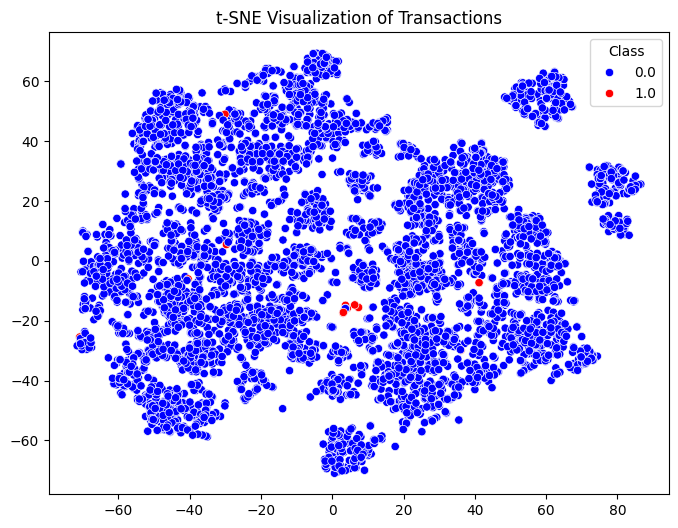

In [ ]:
# Reduce data to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test)

# Plot fraud vs. normal transactions
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_test, palette={0: "blue", 1: "red"})
plt.title("t-SNE Visualization of Transactions")
plt.show()

**👉 Example:**

Think of this like **plotting students' exam marks** on a graph.
If fraudulent transactions appear far from normal transactions, we can visually identify them.

**Step 8: Evaluate Model Performance**

We check the **ROC-AUC Score and Precision-Recall Curve** to see how well the model detects fraud.

ROC-AUC Score: 0.91


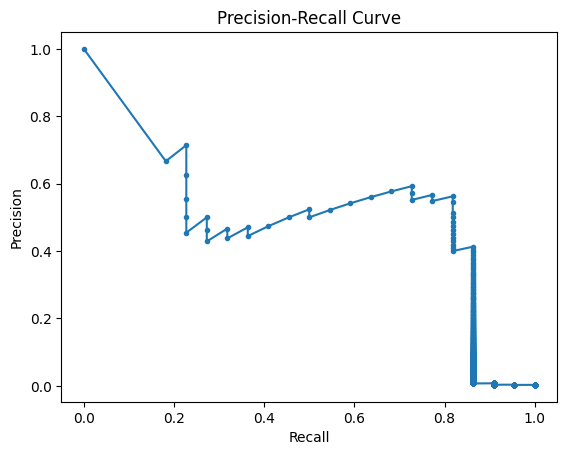

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      8315
         1.0       0.24      0.86      0.37        22

    accuracy                           0.99      8337
   macro avg       0.62      0.93      0.68      8337
weighted avg       1.00      0.99      0.99      8337



In [ ]:
# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

**👉 Example:**

If a **bank security alarm** sounds **only when fraud happens**, it’s good.

If it **rings too often for normal cases**, it’s bad.

The **ROC-AUC Score tells us** how well our model differentiates between fraud and normal transactions.

**Step 9: Learning Outcome**

✅ How to handle highly imbalanced data using SMOTE

✅ How to train a fraud detection model using Logistic Regression

✅ How to visualize fraud patterns using t-SNE

✅ How to evaluate model performance using ROC-AUC and Precision-Recall Curve

**🎯 Final Thought:**

By following these steps, **you can build an effective fraud detection system** used by banks and financial institutions to **prevent credit card fraud**. 🚀

**Follow CTE on LinkedIn:**

https://linkedin.com/company/cte-india

-------

Follow CTE Director on LinkedIn:

Mr. Anilkumar Manchikatla

https://www.linkedin.com/in/anil-manchi

------

**Learning Management System (LMS) of CTE:**

https://learning.ccrofficial.org

**Centre for Training and Employment (CTE) Academy In Collaboration with Council for Citizen Rights (CCR) – National NGO Presents**

**Free AI Project Camp - Credit Card Fraud Detection using AI / ML**

------------ END ----------------